<a href="https://colab.research.google.com/github/qhz-23/lecture1/blob/main/MLLABAssignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

In [127]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [128]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [129]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [130]:
df.loc[df["sex"] == "female", "sex"] = 1
df.loc[df["sex"] == "male", "sex"] = 0
df.loc[df["smoker"] == "yes", "smoker"] = 1
df.loc[df["smoker"] == "no", "smoker"] = 0
# df.loc[df["region"] == "southwest", "region"] = 1
# df.loc[df["region"] == "northwest", "region"] = 2
# df.loc[df["region"] == "southeast", "region"] = 3
# df.loc[df["region"] == "northeast", "region"] = 4
### do the same for smoker and region

In [131]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["southwest","northwest","southeast","northeast"])
list(le.classes_)
# le.transform(["southwest","northwest","southeast","northeast"])
df.region = le.transform(df.region)

In [133]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [134]:
import numpy as np

In [135]:
data = np.array(df.iloc[:, :-1])
# every row, except for the last column
target = np.array (df.iloc[:,-1])

In [136]:
data
# must be in this structure of data
# target will just be our last column

array([[19, 1, 27.9, 0, 1, 3],
       [18, 0, 33.77, 1, 0, 2],
       [28, 0, 33.0, 3, 0, 2],
       ...,
       [18, 1, 36.85, 0, 0, 2],
       [21, 1, 25.8, 0, 0, 3],
       [61, 1, 29.07, 0, 1, 1]], dtype=object)

In [137]:
cut = int(len(data) * 0.8 // 1)

In [138]:
# X_train
in_data = data[:cut]
# X_test
out_data = data[cut:]

# Y_train
in_target = target[:cut]
# Y_test
out_target = target[cut:]

# 3.) Normalize the Data

In [139]:
from sklearn import preprocessing

In [140]:
scaler = preprocessing.StandardScaler().fit(in_data)
# take in-sample data, built scaler object, allow us to scale any data
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [141]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [142]:
# import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)

In [143]:
# .alpha_
a = modCV.alpha_
print(a)

133.34880015958146


# 5.) Run a lasso regression with that Lambda

In [145]:
# use Lasso (fit alpha before)
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
# mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

Text(0.5, 1.0, 'Lasso Regression Output')

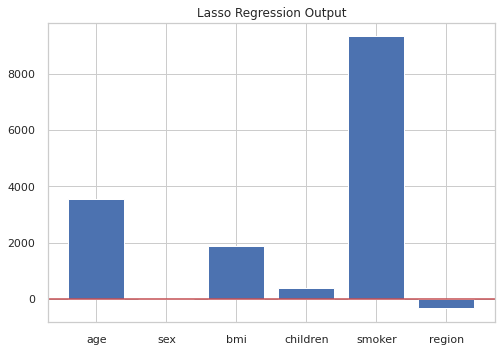

In [146]:
plt.bar(df.columns[:-1], mod1.coef_)
plt.axhline(y=0, color = "r", linestyle = "-")
plt.title("Lasso Regression Output")

# 7.) Interpret the coefficients

In [147]:
# Among the 6 variables, smoker seems to be the most influential one. Age, BMI, Children, and region seem to matter as well.

# 8.) Compare in and out of sample MSE’s

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
pred_train = mod1.predict(np.array(in_data_scale))
mse_train = mean_squared_error(in_target, pred_train)
print("MSE training set", round(mse_train, 2))

MSE training set 36490415.1


In [150]:
pred_test = mod1.predict(np.array(out_data_scale))
mse_test = mean_squared_error(out_target, pred_test)
print("MSE test set", round(mse_test, 2))

MSE test set 37252730.72
